## Color quantization

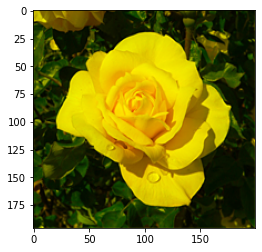

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

flower = cv2.imread("./blomma_Kokchun.png")
#convert
flower = flower[:,:,[2,1,0]]
plt.imshow(flower)

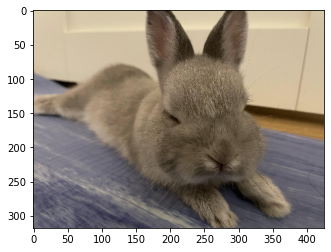

In [2]:
rabbit= cv2.imread("./Kokchun_kanin.jpeg")
rabbit = rabbit[:,:,[2,1,0]]
# make image smaller
resize_factor = .3
height = rabbit.shape[0]
width = rabbit.shape[1]
rabbit = cv2.resize(rabbit, (int(width*resize_factor), int(height*resize_factor)))

plt.imshow(rabbit)

## Color quantization

(39200, 3)
Values before scaling. Min: 0, Max: 255
Cluster centers [[0.07892048 0.12975968 0.        ]
 [0.90506893 0.80114456 0.        ]
 [0.47426834 0.39746772 0.        ]]


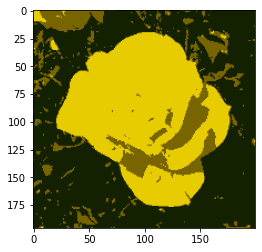

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X_flower = flower.reshape(-1,3)
print(X_flower.shape)
print(f"Values before scaling. Min: {X_flower.min()}, Max: {X_flower.max()}")

scaler = MinMaxScaler()
scaled_X_flower = scaler.fit_transform(X_flower)

kmeans = KMeans(3)
kmeans.fit(scaled_X_flower)

print("Cluster centers",kmeans.cluster_centers_)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_flower = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized_flower)


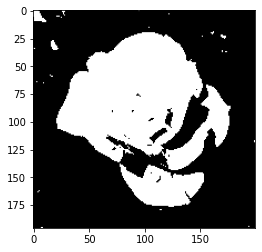

In [35]:
mask = quantized_flower[:,:,1] > .7
plt.imshow(mask, cmap="gray")

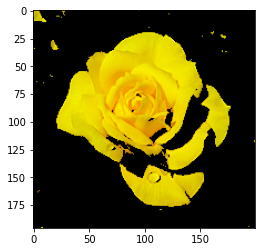

In [36]:
segmented_flower = mask[:,:, None]*flower
plt.imshow(segmented_flower)

## Reducing colors

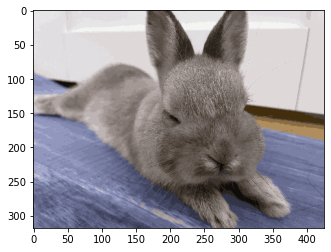

In [44]:
X_rabbit = rabbit.reshape(-1,3)
scaled_X_rabbit = scaler.fit_transform(X_rabbit)

kmeans = KMeans(32)
kmeans.fit(scaled_X_rabbit)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_rabbit = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized_rabbit)
plt.axis("off")
plt.savefig("finkanin")